<a href="https://academics.sheridancollege.ca/programs/computer-engineering-technology"><img src="https://www.sheridancollege.ca/-/media/project/sheridan/shared/images/logos/sheridan-logo-header.svg" width="300" align="center"></a>


<h1><center>AI Application (ENGI51071) - Lab 2 </center></h1>
<h2><center>Student Name(s): Confidence Ahuekwe | Student Number: 991714953 | Date: 31st January, 2024.</center></h2> 
<h3>Lab Overview</h3>
This is part of the lab series for AI Application (ENGI51071). In this lab, we learn how to use basic Python programming, scikitlearn, and pandas to manipulate data and implement linear regression models.  The ploting scheme is using matplotlib to allow inline plotting. 


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href='#Import_Needed_Packages'>Import Needed Packages</a></li>
        <li><a href='#Dataframe_Manipulation'>Dataframe Manipulation</a></li>
        <li><a href='#Data_Visualization'>Data Visualization</a></li>
        <li><a href='#Simple_Linear_Regression'>Simple Linear Regression</a></li>      
        <li><a href='#Multiple_Linear_Regression'>Multiple Linear Regression</a></li>
        <li><a href='#K_fold_Cross_Validation'>K-fold Cross Validation</a></li>
        <li><a href='#Exercise'>Exercise</a></li>
    </ol>
</div>
<br>
<hr>

<a id='Import_Needed_Packages'></a>
<h2> 1. Import Needed packages </h2>
<h3> For this lab, the following packages are needed </h3><br>
numpy: Python library for working with arrays<br>
matplotlib: Python inline ploting library<br>
pandas: Python Data Analysis Library to work with dataframes.  <br>
sklearn: scikit-learn, a commonly used machine learning library. <br>

<h4>Pandas tutorial link: <a href="https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html">click here</a></h4>


In [4]:
# only run this if you don't have matplotlib installed
!pip install matplotlib 

In [2]:
# only run this if you don't have panda installed
!pip install pandas 

In [5]:
# only run this if you don't have sklearn installed
!pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.4 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 643.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.6 MB 9.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/10.6 MB 19.2 MB/s eta 0:00:01
   ------------ --------------------------- 3.2/10.6 MB 22.7 MB/s eta 0:00:01
   ------------------ --------------------- 5.0/10.6 MB 26.4 MB/s eta 0:00:01
   ------------------------- -------------- 6.8/10.6 MB 29.1 MB/s eta 0:00:01
   ------------------------------- -------- 8.4/10.6 MB 29.8 MB/s eta 0:00:01
   ----------------------------------- ---- 9.4/10.6 MB 30.2 MB/s eta 0:00:01
   ---------------------------------------  10.6/10.6 MB 32.8 MB/s eta 0:00:01
 

In [92]:
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import pandas as pd
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics

<a id='Dataframe_Manipulation'></a>
<h2>2. Dataframe Manipulation</h2>
In machine learning, the data is commonly organized in a tabular formart. In Python, library pandas is the most popular one in working with such tables. Pandas uses a data structure called "dataframe" to store tables.  It is defined as "two-dimensional, size-mutable, potentially heterogeneous tabular data." <br>
Essensitally, datafram is Python's answer to tabular data structure.  Dataframes organize attributes and observations as the column and row labels. It is similar to a spreadsheet, a SQL table or the data.frame in R. <br>
To better understand this, let us start working on a more complex dataset with features of different format. Here, we are using a public dataset provided by Corgis database project.  You may find more information about this dataset from the link below: <br>

<h4>Corgis Project link: <a href="https://corgis-edu.github.io/corgis/csv/cars/">click here</a></h4>


In [93]:
df = pd.read_csv("cars.csv") # Use Pandas to read in the car dataset "cars.csv"
df.head()                    # Get the first 5 rows of this dataframe

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [94]:
df.tail()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
5071,13,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX-L,Honda,2012 Honda Pilot,2012,250,253
5072,141,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo Coupe LP 560-4,Lamborghini,2012 Lamborghini Gallardo Coup,2012,552,398
5073,160,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo LP 560-4 Spyder,Lamborghini,2012 Lamborghini Gallardo Spyder,2012,552,398
5074,200,210,110,Rear-wheel drive,BMW 3.0L 6 cylinder 315hp 330 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,17,Gasoline,25,Automatic transmission,2012 BMW 740i Sedan,BMW,2012 BMW 7 Series,2012,315,330
5075,200,94,110,Rear-wheel drive,BMW 3.0L 6 cylinder 315hp 330 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,17,Gasoline,25,Automatic transmission,2012 BMW 740Li Sedan,BMW,2012 BMW 7 Series,2012,315,330


In [95]:
df.shape      # report the size of this dataframe

(5076, 18)

In [96]:
df.describe() # provides a brief statistical dataframe summary

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,145.632191,127.825847,144.012411,5.519110,17.275808,24.125493,2010.867612,270.499409,272.707250
std,62.125026,77.358295,79.925899,0.845637,4.479485,6.488293,0.782951,95.293537,100.123328
min,1.000000,2.000000,1.000000,4.000000,8.000000,11.000000,2009.000000,100.000000,98.000000
25%,104.000000,60.000000,62.000000,5.000000,14.000000,20.000000,2010.000000,190.000000,187.000000
50%,152.000000,128.000000,158.000000,6.000000,17.000000,24.000000,2011.000000,266.000000,260.000000
75%,193.000000,198.000000,219.000000,6.000000,20.000000,28.000000,2011.000000,317.000000,335.000000
max,255.000000,255.000000,254.000000,8.000000,38.000000,223.000000,2012.000000,638.000000,774.000000


In [97]:
df.dtypes

Dimensions.Height                                   int64
Dimensions.Length                                   int64
Dimensions.Width                                    int64
Engine Information.Driveline                       object
Engine Information.Engine Type                     object
Engine Information.Hybrid                            bool
Engine Information.Number of Forward Gears          int64
Engine Information.Transmission                    object
Fuel Information.City mpg                           int64
Fuel Information.Fuel Type                         object
Fuel Information.Highway mpg                        int64
Identification.Classification                      object
Identification.ID                                  object
Identification.Make                                object
Identification.Model Year                          object
Identification.Year                                 int64
Engine Information.Engine Statistics.Horsepower     int64
Engine Informa

__Question 1 (0.5')__: Some attributes are not included in the statistical summary, why? <br>
Please record your answers on lab2 on SLATE quiz tool. <br>
__Ans:__ The reason why some attributes are not included in the statistical summary is because describe() is a pandas function that only provides summary statistics of the numerical columns (attributes) contained in the dataset. From the given dataset (cars.csv), we only have 9 numerical columns of Integer datatype as shown using df.dtypes. <br>

__Question 2 (0.5')__: How many attributes does this dataframe have? <br>
Please record your answers on lab2 on SLATE quiz tool. <br>
__Ans:__ From the result returned using the df.shape method, this dataframe has eighteen (18) attributes.

__Question 3 (0.5')__: How many observations does this dataframe have? <br>
__Ans:__ From the result returned using the df.shape method, this dataframe has 5076 observations.
Please record your answers on lab2 on SLATE quiz tool. <br>


Now you may choose some features for further analysis. It can be implemented by choosing a certain column.

In [98]:
new_df = df[['Engine Information.Number of Forward Gears','Fuel Information.City mpg','Fuel Information.Highway mpg','Engine Information.Engine Statistics.Horsepower','Engine Information.Engine Statistics.Torque']]
new_df.head()

,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,6,18,25,250,236
1,6,22,28,200,207
2,6,21,30,200,207
3,6,21,28,200,207
4,6,21,28,200,207


Everything looks good, except the attribute names are way too long. Let's change them. 

In [99]:
new_df.columns = ['Gears','CityMPG','HighwayMPG','Horsepower','Torque']
new_df.head()

,Gears,CityMPG,HighwayMPG,Horsepower,Torque
0,6,18,25,250,236
1,6,22,28,200,207
2,6,21,30,200,207
3,6,21,28,200,207
4,6,21,28,200,207


__Question 4 (0.5')__: In order to train a prediction model for Fuel Efficiency in City (CityMPG), which features are considered the indepedent variables, which one is the dependent variable?  <br>
Please record your answers on lab2 on SLATE quiz tool. <br>
__Ans:__ Independent Variables also known as input variables include: Gears, Horspower, and Torque. WHILE The dependent variable (output) is CItyMPG.

<a id='Data_Visualization'></a>
<h2>3. Data_visualization</h2>
Now the desired features are selected and their labels are changed.  Before implementing any machine learning algorithm, it is recommended that we plot these data points to ensure the range and distribution of the data are as expected and will be compatible with our model. <br>
Today, we are going to use histogram tool and scatter plot tool to do data visualization. 

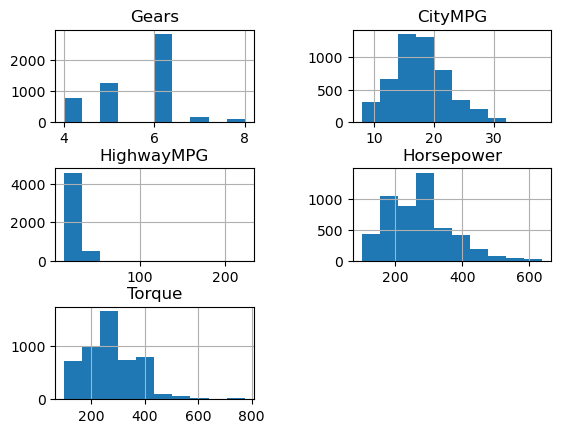

In [100]:
# Plot the histograms of each feature separately. 
view = new_df[['Gears','CityMPG','HighwayMPG','Horsepower','Torque']]
view.hist()
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show() 

__Note__: Histogram only shows the distribution of data points in each data bins.  It is not enlightening in terms of analysing the degree of linearity between the dependent and independent variables. <br>
In order to visualize the linearity feature, it is recommended that scatter plot is used. You need to pick the x and y axis for scatterplots.  Below will create a scatterplot of Gears and CityMPG. 

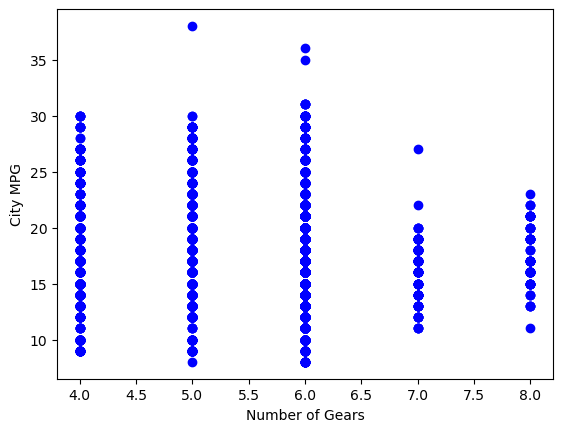

In [101]:
plt.scatter(new_df.Gears, new_df.CityMPG,  color='blue')
plt.xlabel("Number of Gears")
plt.ylabel("City MPG")
plt.show()

__Task 1 (1')__. Please use the cell below to plot the scatterplots of Horsepower vs CityMPG. <br>
Please record your codes on lab2 on SLATE quiz tool. <br>

<function matplotlib.pyplot.show(close=None, block=None)>

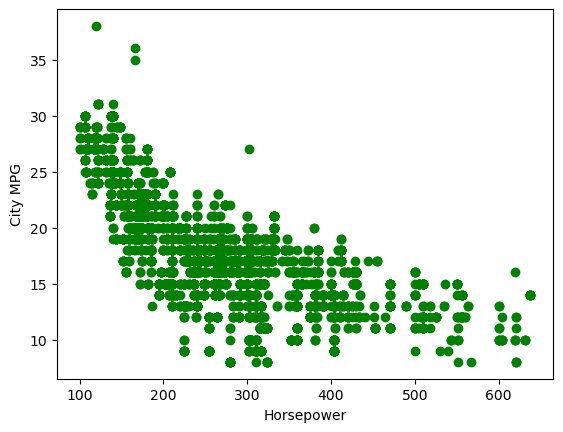

In [102]:
# Write your code here
plt.scatter(new_df.Horsepower, new_df.CityMPG, color='green')
plt.xlabel("Horsepower")
plt.ylabel("City MPG")
plt.show


Please use the cell below to plot the scatterplots of Torque vs CityMPG.

<function matplotlib.pyplot.show(close=None, block=None)>

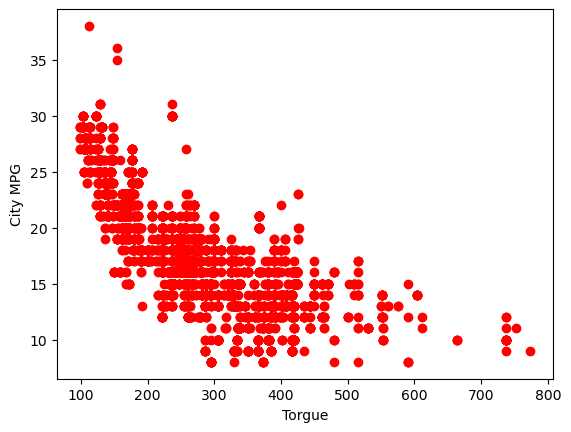

In [103]:
# Write your code here
plt.scatter(new_df.Torque, new_df.CityMPG, color='red')
plt.xlabel("Torgue")
plt.ylabel("City MPG")
plt.show


Please use the cell below to plot the scatterplots of HighwayMPG vs CityMPG.

<function matplotlib.pyplot.show(close=None, block=None)>

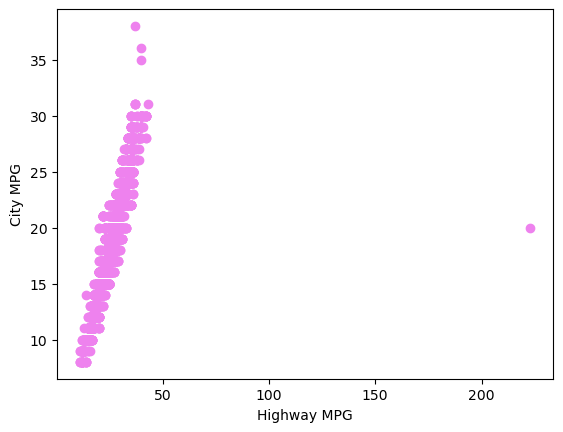

In [104]:
# Write your code here
plt.scatter(new_df.HighwayMPG, new_df.CityMPG, color='violet')
plt.xlabel("Highway MPG")
plt.ylabel("City MPG")
plt.show

Something is not right about this dataset, we have an obvious outlier that needs to be removed. In pandas, you can drop a row of a dataframe by satisfying a conditional expression. <br>
df = df.drop(df[boolean condition].index)

<function matplotlib.pyplot.show(close=None, block=None)>

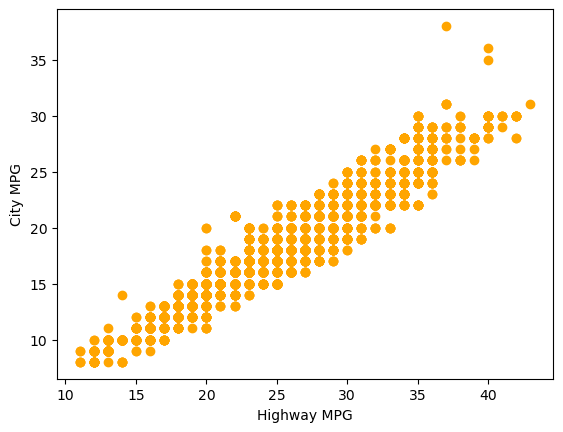

In [105]:
new_df = new_df.drop(new_df[new_df.HighwayMPG>100].index)
# Write your code here to visualize the result
plt.scatter(new_df.HighwayMPG, new_df.CityMPG, color='orange')
plt.xlabel("Highway MPG")
plt.ylabel("City MPG")
plt.show

__Question 5 (1')__: Analyzing scatterplots shown above, which independent variable is best suited for predicting CityMPG using simple linear regression? Why?  <br>
Please record your answers on lab2 on SLATE quiz tool. <br>
__Ans:__ Based on the scatterplots, we can conclude that the best independent variable for predicting CityMPG using simple linear regression is HighwayMPG, as it has the strongest and most linear relationship with CityMPG. The scatterplots of HighwayMPG vs CityMPG after removing the outlier show a clear upward trend, indicating a positive linear relationship.


<a id='Simple_Linear_Regression'></a>
<h2>4. Simple Linear Regression</h2>

Once you decide on the independent and dependent variable and the prediction model (simple linear regression in our case), you are ready to implement the algorithm now. <br>
To implement simple linear regression, you need to:
<ol>
    <li>Split the data set into training and testing (for example, use 90% as training, and 10% as testing in our case) </li>
    <li>Train a simple linear regression model using the training data set</li>
    <li>Plot the linear fitting line over the original scatterplot </li>
    <li>Use the trained model to predict y_hat of the testing dataset </li>
    <li>Compute the MSE of your prediction on test data set</li>
</ol>

The cell below shows the code sequence to achieve that. 

In [106]:
# dataset splitting
mask = np.random.rand(len(new_df)) < 0.9
train = new_df[mask]
test = new_df[~mask]

In [107]:
# create a linear regression model and assign independant and dependant variables
slr_model = linear_model.LinearRegression()
train_x = np.asanyarray(train[['HighwayMPG']])
train_y = np.asanyarray(train[['CityMPG']])

In [108]:
# use training dataset to train the model and find regression coefficients
slr_model.fit (train_x, train_y)
# The coefficients
print ('Beta1: ', slr_model.coef_)
print ('Beta0: ',slr_model.intercept_)
print ('Fitting equation is: y='+str(slr_model.intercept_[0])+'+x*'+str(slr_model.coef_[0][0]))

Beta1:  [[0.7290573]]
Beta0:  [-0.28265682]
Fitting equation is: y=-0.2826568206195148+x*0.7290573001705387


Now plot the linear fit on our data: 

Text(0, 0.5, 'City MPG')

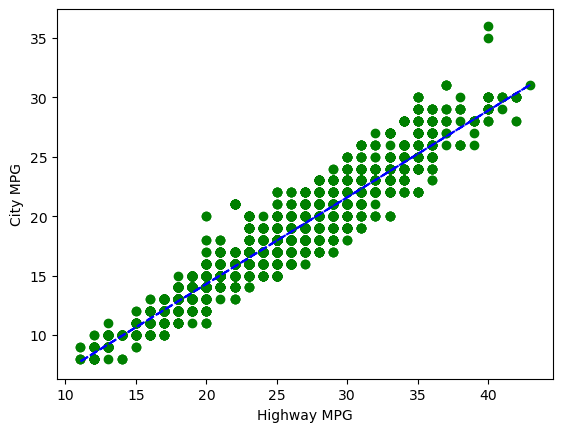

In [109]:
plt.scatter(train.HighwayMPG, train.CityMPG,  color='green')
plt.plot(train_x, slr_model.coef_[0][0]*train_x + slr_model.intercept_[0], '--b')
plt.xlabel("Highway MPG")
plt.ylabel("City MPG")

Now the linear regression model is created, we are going to use the test dataset to see how accurate our model is:

In [76]:
test_x = np.asanyarray(test[['HighwayMPG']])
test_y = np.asanyarray(test[['CityMPG']])
test_y_hat = slr_model.predict(test_x)

print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Mean Squared Error: %.2f" % np.mean((test_y_hat - test_y) ** 2))

Mean Absolute Error: 0.96
Mean Squared Error: 1.64


<a id='Multiple_Linear_Regression'></a>
<h2> 5. Multiple Linear Regression </h2>
<h3>Multiple linear regression is very useful for the following scenarios </h3>
When you are not sure if multple independent variables will impact the modeling of the dependent variable; or when you want to evaluate the impact of individual independent variables and prioritize them.

In our case, instead of focusing on only one independent variable, you can use three indepedent variables (Gears, Horsepower, Torque to predict the dependent variable CityMPG.  

<h3> Data modeling </h3>

Once you decide on the independent and dependent variable and the multiple linear regression prediction model, you are ready to implement the algorithm now. To implement multiple linear regression, the steps are similar to that of the simple linear regression:
<ol>
    <li>Split the data set into training and testing (for example, use 80% as training, and 20% as testing in our case) </li>
    <li>Train a multiple linear regression model using the training data set</li>
    <li>Use the trained model to predict y_hat of the testing dataset </li>
    <li>Compute the error of your prediction on test data set</li>
</ol>

The cell below shows the code sequence to achieve that. 

In [82]:
mask = np.random.rand(len(new_df)) < 0.8
train = new_df[mask]
test = new_df[~mask]

In [88]:
mlr_model = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Horsepower','Torque','Gears']])
train_y = np.asanyarray(train[['CityMPG']])
mlr_model.fit(train_x, train_y)
# The coefficients
print('Beta3: '+'%.5f' % mlr_model.coef_[0][2])
print('Beta2: '+'%.5f' % mlr_model.coef_[0][1])
print('Beta1: '+'%.5f' % mlr_model.coef_[0][0])
print('Beta0: '+'%.5f' % mlr_model.intercept_)

Beta3: 0.78365
Beta2: -0.03254
Beta1: -0.00319
Beta0: 22.67683


C:\Users\user\AppData\Local\Temp\ipykernel_34588\3843337797.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Beta0: '+'%.5f' % mlr_model.intercept_)


__Question 6 (1')__: Based on the regression coefficients, what is the fitting equation in this case? <br>
Please record your answers on lab2 on SLATE quiz tool. <br>
__Ans:__ Fitting equation, Y = Beta0 + Beta1+ Beta2 + Beta3 = 22.67683 + (-0.00319) + (-0.303254) + 0.78365.

__Question 7 (1')__: Does a bigger regression coefficient means that the corresponding independent variable has the biggest impact? Why?  <br>
Please record your answers on lab2 on SLATE quiz tool. <br>
__Ans:__ No, a bigger regression coefficient does not necessarily mean that the corresponding independent variable has the biggest impact. This is because the regression coefficient measures the change in the dependent variable for a unit change in the independent variable, holding other variables constant. However, the magnitude of the regression coefficient also depends on the scale and the units of the independent variable.

<a id='K_fold_Cross_Validation'></a>
<h2>6. K-fold Cross Validation </h2>
Now, we have two models to predict the city fuel efficiency CityMPG.  In order to compare the two models, let's set up the K-fold cross validation. 

In [89]:
from sklearn.model_selection import cross_val_score
x = np.asanyarray(new_df[['Horsepower','Torque','Gears']])
y = np.asanyarray(new_df[['CityMPG']])
scores = cross_val_score(mlr_model, x, y, cv=5, scoring='neg_mean_squared_error')
print(scores)
print('The mean reported MSE using K-fold is: %.2f' % np.mean(scores))

[-10.61452343  -7.72374462  -8.78036468  -9.53140113  -8.54975462]
The mean reported MSE using K-fold is: -9.04


__Question 8 (1')__: Why are there five MSE scores reported in this case?  <br>

__Ans:__ Five MSE scores was reported because we set cv=5 in the fourth line of code above which  means that the cross_val_score function should train and test the mlr_model on the x and y arrays using a 5-fold cross-validation strategy. The cross_val_score function returns an array of scores, one for each fold of the cross-validation.

Additionally, we can use other scores such as R^2 score to evaluate the model. R^2 (coefficient of determination) is a regression score function. <br>
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.
Read more in the Scikit Learn User Guide from the link below: <br>

<h4>R^2 Score, more to read: <a href="https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score">click here</a></h4>

In order to use R^2 as the evaluation score, simply change the scoring parameter to 'r2'

scores = cross_val_score(mlr_model, x, y, cv=5, scoring='r2') <br>

__Task 2 (1')__: Now based on that information, please use the cell below to create a K-fold cross validation on the simple linear regression model (with R2 as the evaluation score). <br>
Please record your code on lab2 on SLATE quiz tool. <br>

In [90]:
# Write your code here
from sklearn.model_selection import cross_val_score
x2 = np.asanyarray(new_df[['HighwayMPG']])
y2 = np.asanyarray(new_df[['CityMPG']])
scores2 = cross_val_score(slr_model, x2, y2, cv=5, scoring='r2')
print(scores2)
print('The mean reported R-Squared using K-fold is: %.2f' % np.mean(scores2))

[0.89228359 0.84277194 0.90300655 0.87018922 0.94073041]
The mean reported R-Squared using K-fold is: 0.89


<a id='Pactice'></a>
<h2>7. Practice </h2>
Now with two regresssion models completed, we have created two models to predict the city fuel efficiency CityMPG.  You can compare the models created during these exercises and decide how to improve the model. <br>


__Exercise (2')__: Use the cell below to train a best model using the following requirements:
<ol>
    <li>Use either multiple or simple linear regression. </li>
    <li>Carefully choose the independent variable(s) to be used in your model, they are not limited to only the hoursepower and torque. </li>
    <li>Use K-fold cross validation with r2 score to provide rationale why your model is preferred.  </li>
</ol>
Please record your code on lab2 on SLATE quiz tool. <br>

Beta1:  [[-0.03280404]]
Beta0:  [26.13496687]
Fitting equation is: y=26.13496687198759+x*-0.03280404369748073


Text(0, 0.5, 'City MPG')

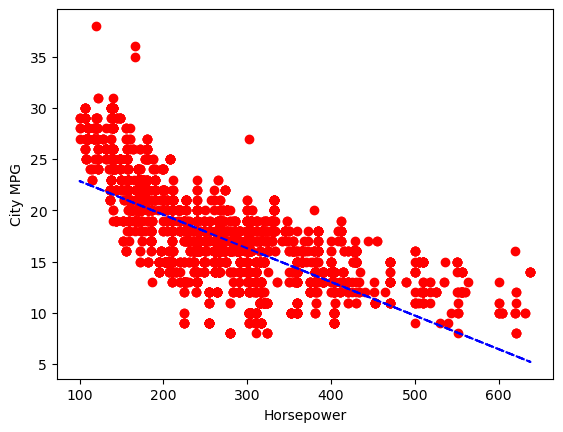

In [131]:
# Write your code here
# Using Simple linear regresion, split the dataset using 85% as training, and 15% as testing
mask2 = np.random.rand(len(new_df)) < 0.85 
train2 = new_df[mask2]
test2 = new_df[~mask2]

# 2. Carefully choose the independent variable(s) to be used in your model
# I choosed to make Horsepower my independent variable now because I worked with HighwayMPG in my previous SLR model.

slr_model2 = linear_model.LinearRegression()
train_x2 = np.asanyarray(train2[['Horsepower']])
train_y2 = np.asanyarray(train2[['CityMPG']])

# use training dataset to train the model and find regression coefficients
slr_model2.fit (train_x2, train_y2)
# The coefficients
print ('Beta1: ', slr_model2.coef_)
print ('Beta0: ',slr_model2.intercept_)
print ('Fitting equation is: y='+str(slr_model2.intercept_[0])+'+x*'+str(slr_model2.coef_[0][0]))

plt.scatter(train2.Horsepower, train2.CityMPG,  color='red')
plt.plot(train_x2, slr_model2.coef_[0][0]*train_x2 + slr_model2.intercept_[0], '--b')
plt.xlabel("Horsepower")
plt.ylabel("City MPG")

In [134]:
test_x2 = np.asanyarray(test2[['Horsepower']])
test_y2 = np.asanyarray(test2[['CityMPG']])
test_y_hat2 = slr_model2.predict(test_x2)

print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y_hat2 - test_y2)))
print("Mean Squared Error: %.2f" % np.mean((test_y_hat2 - test_y2) ** 2))

Mean Absolute Error: 2.34
Mean Squared Error: 8.97


In [135]:
# Write your code here
# Use K-fold cross validation with r2 score to provide rationale why your model is preferred. 
from sklearn.model_selection import cross_val_score
x3 = np.asanyarray(new_df[['Horsepower']])
y3 = np.asanyarray(new_df[['CityMPG']])
scores3 = cross_val_score(slr_model2, x3, y3, cv=5, scoring='r2')
print(scores3)
print('The mean reported R-Squared using K-fold for my model is: %.2f' % np.mean(scores3))

[ 0.42988099  0.48351452  0.44432922 -0.32353049  0.49198445]
The mean reported R-Squared using K-fold for my model is: 0.31


__NOTE:__ From the K-fold cross validation with R-squared score result above, we can deduce that this model is less close to predicting the actual observations.